### 1. Plot two clusters of points for training dateset

- Generate two sets of separable random point clusters in $`\mathbb{R}^2`$

In [2626]:
import numpy as np

cluster1_train_points = (20, 20) * np.random.random((100, 2)) + (-5, -5)
cluster2_train_points = (20, 20) * np.random.random((100, 2)) + (20, -5)

- Let $`\{ x_i \}_{i=1}^n`$ be a set of points and $`\{ y_i \}_{i=1}^n`$ be their corresponding labels

In [2627]:
x_train = np.concatenate((cluster1_train_points, cluster2_train_points))
y_train = np.concatenate((np.zeros(100), np.ones(100)))

- Plot the point clusters in the training dataset using different colors depending on their labels

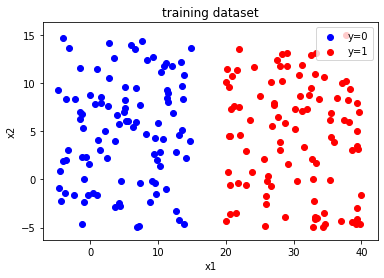

In [2628]:
import matplotlib.pyplot as plt

plt.title('training dataset')
plt.scatter(x_train[:100, 0], x_train[:100, 1], c='blue')
plt.scatter(x_train[100:, 0], x_train[100:, 1], c='red')
plt.legend(['y=0', 'y=1'])
plt.xlabel('x1')
plt.ylabel('x2')
plt.show()

### 2. Plot two clusters of points for testing dataset

- Generate two sets of separable random point clusters in $`\mathbb{R}^2`$ for a testing dataset using the same centroid and the standard deviation of random generator as the training dataset

In [2629]:
cluster1_test_points = np.random.normal(np.mean(cluster1_train_points, axis=0), np.std(cluster1_train_points, axis=0), (200, 2))
cluster2_test_points = np.random.normal(np.mean(cluster2_train_points, axis=0), np.std(cluster2_train_points, axis=0), (200, 2))

x_test = np.concatenate((cluster1_test_points, cluster2_test_points))
y_test = np.concatenate((np.zeros(200), np.ones(200)))


- Plot the point clusters in the testing dataset using different colors depending on their labels (different colors from the training dataset)


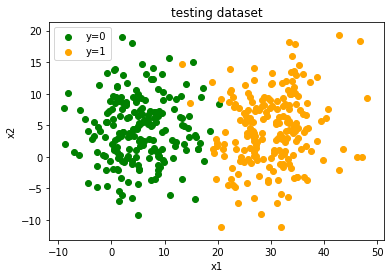

In [2630]:
plt.title('testing dataset')
plt.scatter(x_test[:200, 0], x_test[:200, 1], c='green')
plt.scatter(x_test[200:, 0], x_test[200:, 1], c='orange')
plt.legend(['y=0', 'y=1'])
plt.xlabel('x1')
plt.ylabel('x2')
plt.show()



### 4. Plot the learning curves


- Apply the gradient descent algorithm


In [2631]:
def sigmoid(result):
    return 1 / (1 + np.exp(-result))

def cost(y, y_pred):
    epsilon = 1e-12
    return -1 * (np.mean(
        y * np.log(y_pred + epsilon) + (1 - y) * np.log(1 - y_pred + epsilon)
    ))

def accuracy(pred, actual):
    result = (pred >= 0.5).astype(int)
    return np.mean(result == actual)


In [2632]:
# set initial parameters
w = np.zeros((1, x_train.shape[1]))
b = 0

learning_rate = 0.01

training_loss = []
testing_loss = []

training_acc = []
testing_acc = []

m = x_train.shape[0]

y_train_reshape = y_train.reshape(len(y_train), 1)
y_test_reshape = y_test.reshape(len(y_test), 1)

for i in range(1000):
    y_pred_train = sigmoid(np.dot(x_train, w.T) + b)
    train_cost = cost(y_train_reshape, y_pred_train)
    
    y_pred_test = sigmoid(np.dot(x_test, w.T) + b)
    test_cost = cost(y_test_reshape, y_pred_test)
    
    training_loss.append(train_cost)
    testing_loss.append(test_cost)
    
    training_acc.append(accuracy(y_pred_train, y_train_reshape))
    testing_acc.append(accuracy(y_pred_test, y_test_reshape))
    
    dw = (1 / m) * np.dot((y_pred_train - y_train_reshape).T, x_train)
    db = (1 / m) * np.sum(y_pred_train - y_train_reshape)
    
    w -= learning_rate * dw
    b -= learning_rate * db


- Plot the training loss at every iteration
- Plot the testing loss at every iteration

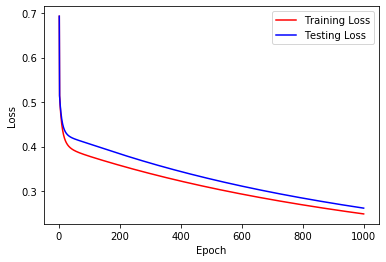

In [2633]:
epoch_count = range(1, len(training_loss) + 1)
plt.plot(epoch_count, training_loss, 'r-')
plt.plot(epoch_count, testing_loss, 'b-')
plt.legend(['Training Loss', 'Testing Loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

- Plot the training accuracy at every iteration
- Plot the testing accuracy at every iteration

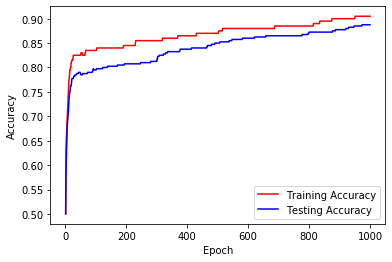

In [2634]:
epoch_count = range(1, len(training_acc) + 1)
plt.plot(epoch_count, training_acc, 'r-')
plt.plot(epoch_count, testing_acc, 'b-')
plt.legend(['Training Accuracy', 'Testing Accuracy'])
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.show()
